In [3]:
import pandas as pd
import seaborn as sns
import os
import tensorflow.keras as keras

In [4]:
SAVE_DIR = r"/Users/James/Documents/Python/MachineLearningProjects/Spotify_Listening_Analysis/Spotify 2.0/ml_stuff/postprocessing"
PREDICTION_DF_PATH = r"C:\Users\JM070903\OneDrive - Jacobs\Documents\Python\Spotify Listening Analysis\Spotify_Analysis\ML\Prediction\predictions_dataframe.pkl"

In [5]:
predictions = pd.read_pickle(PREDICTION_DF_PATH)

In [6]:
predictions

,artist,track,predicted_playcount
0,The Beatles,Sgt. Pepper's Lonely Hearts Club Band - Remast...,0.825348
1,The Beatles,With A Little Help From My Friends - Remastere...,0.844998
2,The Beatles,Lucy In The Sky With Diamonds - Remastered 2009,0.873288
3,The Beatles,Getting Better - Remastered 2009,0.841246
4,The Beatles,Fixing A Hole - Remastered 2009,0.835203
...,...,...,...
6635,OutKast,Mamacita,0.791390
6636,OutKast,SpottieOttieDopaliscious,0.800198
6637,OutKast,Nathaniel,0.942982
6638,OutKast,Liberation (with Cee-Lo),0.831235


In [7]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   artist               6640 non-null   object 
 1   track                6640 non-null   object 
 2   predicted_playcount  6640 non-null   float64
dtypes: float64(1), object(2)
memory usage: 155.8+ KB


# What are my top 5 songs?

In [9]:
predictions.sort_values(by = "predicted_playcount", ascending = False)[:5]

,artist,track,predicted_playcount
3935,Black Sabbath,Orchid - 2014 Remaster,1.055992
2033,Black Sabbath,Planet Caravan - 2012 - Remaster,1.049278
5712,Brian Eno,Zawinul/Lava - 2004 Digital Remaster,1.047849
5926,Steve Miller Band,Blue Odyssey,1.046984
5711,Brian Eno,Becalmed - 2004 Digital Remaster,1.044207


This is pretty unusual, I would have expected The Beatles, Pink Floyd, The Doors... Black Sabbath isn't too surprising but I would never listen to Brian Eno so coming in at no.3 seems like something is definitely off. 

## What is the distribution like?

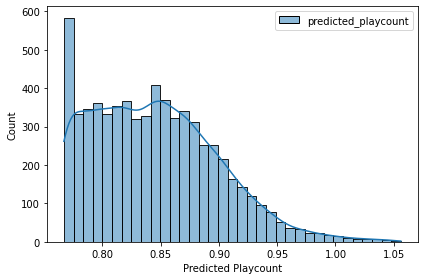

In [10]:

import matplotlib.pyplot as plt
ax = sns.histplot(data = predictions, stat = "count", kde = True)
ax.set(xlabel = "Predicted Playcount")
image_name = "prediction_histplot"
fig  = ax.get_figure()
plt.tight_layout()
#fig.savefig(os.path.join(SAVE_DIR, image_name), facecolor = "w", dpi = 300)

<AxesSubplot:xlabel='predicted_playcount'>

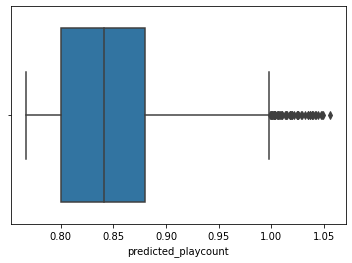

In [11]:
sns.boxplot(data = predictions, x = "predicted_playcount")

Looks like the algorithm is far too conservative, placing all the songs within 0.7 - 1.05 playcounts. So there's no songs I would really like or really hate.

In [13]:
predictions["predicted_playcount"].min(), predictions["predicted_playcount"].max() 

(0.7669973969459534, 1.0559923648834229)